# CS 584 :: Data Mining :: George Mason University :: Spring 2024


# Homework 1: KNN&PCA

- **100 points [8% of your final grade]**
- **Due Sunday, Feb 18 by 11:59pm**

- *Goals of this homework:* (1) implement the KNN algorithm for classifying handwritten digit images; (2) implement the PCA algorithm to reduce the feature dimension so that we can speed up the KNN algorithm and also improve the classification performance; (3) tune the hyperparameters of the KNN and PCA algorithms to produce classification result as good as possible.

- *Submission instructions:* for this homework, you need to submit to two different platforms. First, you should submit your notebook file to **Blackboard** (look for the homework 1 assignment there). Please name your submission **FirstName_Lastname_hw1.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw1.ipynb**. Your notebook should be fully executed so that we can see all outputs. Then, you need to output a txt file from this notebook (you will see later in this notebook) and submit it to the HW1 page in the http://miner2.vsnet.gmu.edu website.

## Part 1: KNN (40 points)

In this part, you need to implement your own KNN algorithm for classifying the digits (from 0 to 9) from the handwritten digit images (28 pixel * 28 pixel). The provided train.txt is the training data you will use for building your model. Each line in the file is one sample, whose first value is the ground-truth label and the following 784 values are the pixels of the image. First of all, let's load the data by excuting the following code.

In [2]:
import numpy as np

data = np.loadtxt("train.txt", delimiter=',')
labels = data[:, 0].astype(int)
features = data[:, 1:]
print('array of labels: shape ' + str(np.shape(labels)))
print('array of feature matrix: shape ' + str(np.shape(features)))

array of labels: shape (60000,)
array of feature matrix: shape (60000, 784)


Now, we have the label variable to store the ground-truth labels (from 0 to 9) of all 60,000 samples, and matrix features to store the image pixels of these samples. Next, let's excute the following code to plot the first 4 samples to see how these images look like.

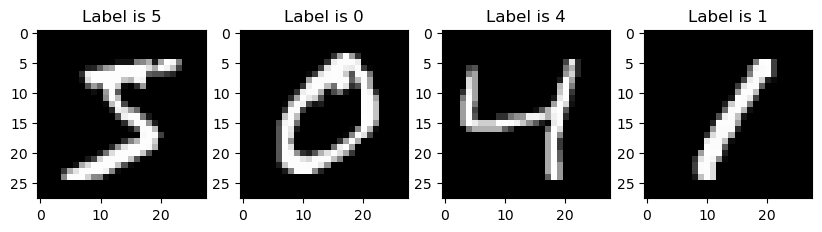

In [3]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 4, figsize=(10, 50))
for i in range(4):  
    ax[i].imshow(features[i].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    ax[i].set_title('Label is %d' % labels[i])

Next, you need to randomly select 20% samples (sampling without replacement) from the data as the **validation set**, and generate the new **training set** by removing the selected validation samples from the original dataset. Write your code in the next cell.

**Note: You are NOT allowed to directly call APIs from an exiting Machine Learning library like sklearn. But you can use the 'random' library or the random module from 'numpy'**.

In [4]:
# Write your code here
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Calculate the number of samples to select as validation samples (20% of the dataset)
num_validation_samples = int(len(labels) * 0.2)

# Generate random indices for the validation samples
validation_indices = np.random.choice(len(labels), size=num_validation_samples, replace=False)

# Create the validation set
validation_labels = labels[validation_indices]
validation_features = features[validation_indices]

# Create the training set by selecting the samples that are not in the validation set
training_indices = np.setdiff1d(np.arange(len(labels)), validation_indices)
training_labels = labels[training_indices]
training_features = features[training_indices]

print('Validation set labels: shape ' + str(np.shape(validation_labels)))
print('Validation set feature matrix: shape ' + str(np.shape(validation_features)))
print('Training set labels: shape ' + str(np.shape(training_labels)))
print('Training set feature matrix: shape ' + str(np.shape(training_features)))


Validation set labels: shape (12000,)
Validation set feature matrix: shape (12000, 784)
Training set labels: shape (48000,)
Training set feature matrix: shape (48000, 784)


Now, it's time to implement your KNN algorithm. In the next cell, please write your code to predict labels for samples in the validation set by the KNN model built on the training set. Here we set K = 10 and use the Euclidean distance to find neighbors.

**Note: You should implement the algorithm by Python, Numpy, and other libraries you think are necessary. You are NOT allowed to directly call APIs from an exiting Machine Learning library like sklearn.**

**Note: Here, you should only use the labels from the training set for the KNN model.**

**Note: You can install and use the 'tqdm' library to help you track the process of your algorithm. Details are 'https://github.com/tqdm/tqdm'**

**Note: It takes 30~60 min to excute the KNN algorithm.**

In [6]:
# Write your code here
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from tqdm import tqdm

def euclidean_distance(a, b):
    """Compute the Euclidean distance between two arrays."""
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def knn_predict(training_features, training_labels, validation_features, k=10):
    predictions = []

    # Iterate over all the validation samples
    for val_feature in tqdm(validation_features, desc="Predicting"):
        # Calculate distances from the current validation sample to all training samples
        distances = euclidean_distance(training_features, val_feature)

        # Get the indices of the k nearest neighbors
        nearest_neighbor_ids = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        nearest_neighbor_labels = training_labels[nearest_neighbor_ids]

        # Predict the label by taking the most common label among the nearest neighbors
        prediction = np.argmax(np.bincount(nearest_neighbor_labels))
        predictions.append(prediction)

    return np.array(predictions)

# Set K
k = 10

# Predict the labels for the validation set
predicted_labels = knn_predict(training_features, training_labels, validation_features, k)

print('Predicted labels: shape ' + str(np.shape(predicted_labels)))

Predicting: 100%|█████████████████████████████████████████████████████████████████████| 12000/12000 [1:09:03<00:00,  2.90it/s]

Predicted labels: shape (12000,)


Then, please write code to compute the Accuracy, and Micro-averaged and Macro-averaged F1 scores to evaluate the performance on the validation set.

Print out these three metrics.

In [8]:
# Write your code here
from sklearn.metrics import f1_score, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(validation_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

#micro-averaged F1 score
micro_f1 = f1_score(validation_labels, predicted_labels, average='micro')
print(f'Micro-averaged F1 score: {micro_f1:.2f}')

# Calculate macro-averaged F1 score
macro_f1 = f1_score(validation_labels, predicted_labels, average='macro')
print(f'Macro-averaged F1 score: {macro_f1:.2f}')


Accuracy: 96.64%
Micro-averaged F1 score: 0.97
Macro-averaged F1 score: 0.97


## Part 2: PCA (30 points)

In this part, you will implement the PCA algorithm to reduce the input dimension for the handwritten digit recognition task. In the next cell, please write your code to compute the transformation matrix in the PCA method for the training set we got from the previous part. Here, we only keep the **top 50 dimensions**.

**Hint: You can use the function from the Numpy library to compute SVD:**

*u, s, v = np.linalg.svd(a, full_matrices=False)*


**Note: You should only use the training set to compute PCA without using validation set.**

In [ ]:
# Write your code here

Now, you need to apply the computed transformation matrix to reduce the dimension for the training set and the validation set. Then, build a new KNN model on the dimension-reduced traning data and predict the labels for the dimension-reduced validation set. 

Print out the Accuracy, and Micro-averaged and Macro-averaged F1 scores.

In [ ]:
# Write your code here

## Part 3: Tune Hyperparameter [Need to submit to Miner2] (30 points)

In this part, you need to do your best to tune the hyperparameter in KNN and PCA to build the best model and submit the predictions for the testing data to Miner2 system. First of all, let's load the testing data by excuting the following code.

In [ ]:
test_features = np.loadtxt("test.txt", delimiter=',')
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))

Now, you should tune three hyperparameters:

- the number of nearest neighbors in KNN 
- the distance measurement (choose from Euclidean distance, L1 norm distance, and cosine distance)
- the number of dimensions kept in PCA 

Rules:

- Write your predictions for samples in the testing set into a file, in which each line has one integer indicating the prediction from your best model for the corresponding sample in the test.txt file. Please see the format.txt file in Miner2 as one submission example. Name the submission file hw1_Miner2.txt and submit it to Miner2 HW1 page.
- The public leaderboard shows results for 50% of randomly chosen test instances only. This is a standard practice in data mining challenge to avoid gaming of the system. The private leaderboard will be released after the deadline evaluates all the entries in the test set.
- You are allowed 5 submissions in a 24 hour cycle. 
- The final score and ranking will always be based on the last submission.
- Grading will only be based on the model performance (based on Accuracy metric) instead of ranking. You'll get full credit as long as your socre is a reasonable number.


**Hint: You can tune these hyperparameters by one randomly generated validation set (like what you have done in previous parts), or you can also use the cross-validation method.**

In [ ]:
# Write your code here

### Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?

#### Write your answer here

### Question: your username in Miner2 and the score and ranking of your submission in Miner2 (at the time of answering this question)

#### Write your answer here

